In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Elastic Net
Elastic NetはRedge回帰とLasso回帰を組み合わたものである.正則化項は次に示すようにRedge回帰とLasso回帰の正則化項を混ぜ合わせたものである.パラメータ$r$によってRedge回帰とLass回帰の正則化項の割合を変更することができる.
$$J(\theta) = MSE(\theta)+(1-r)\frac{\alpha}{2}\sum_{i=1}^{n}\theta_i^2+r\alpha \sum_{i=1}^{n}|\theta_i|$$

In [2]:
df = pd.read_csv("data3.csv")
df.head()

,x,y
0,4.337520,7.763191
1,0.201284,7.851685
2,-0.504076,7.773407
3,0.812612,9.694481
4,4.670285,7.922672


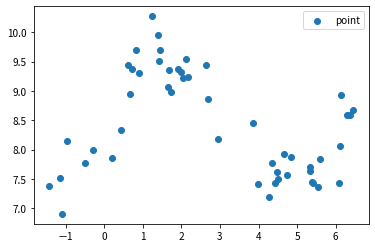

In [3]:
plt.figure(facecolor='white')
plt.scatter(df["x"],df["y"],label='point')
plt.legend()

## scikit-learnによるElastic Net

In [4]:
degree = 4
from sklearn.preprocessing import PolynomialFeatures 

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [5]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.1,l1_ratio=0.5) # l1_ratioはパラメータrのこと
model.fit(X_poly,y)

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.5290164405469, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.1)

In [6]:
print("切片 : ",model.intercept_[0])
print("傾き : ",model.coef_)
print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y

切片 :  8.740940142438433
傾き :  [ 0.70024501 -0.20802764 -0.03514978  0.00782219]
決定係数 :  0.7743179370176889


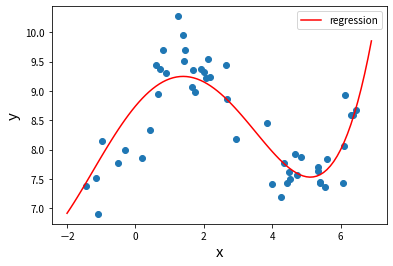

In [7]:
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成
Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
ypred = model.predict(Xpred_poly) # 予測

plt.figure(facecolor="white")
plt.scatter(df["x"],df["y"])
plt.plot(Xpred,ypred,c="r",label="regression")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.show()

## ハイパーパラメータの効果

### alphaを変化させたとき

alpha :  0
切片 :  8.750385452096701
傾き :  [ 0.93441723 -0.33079316 -0.01674545  0.00707951]
決定係数 :  0.7962557418081162

alpha :  0.1
切片 :  8.740940142438433
傾き :  [ 0.70024501 -0.20802764 -0.03514978  0.00782219]
決定係数 :  0.7743179370176889

alpha :  1
切片 :  8.896116192063175
傾き :  [ 0.         -0.         -0.03360823  0.00491293]
決定係数 :  0.3220254869741327



<ipython-input-13-03469c2fc6e2>:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_poly,y)
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9098499221141587, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.5290164405469, tolerance: 0.0

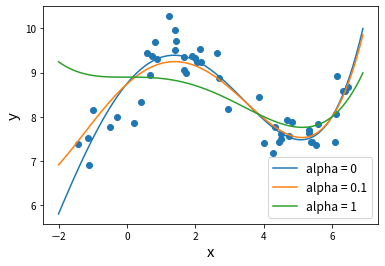

In [13]:
degree = 4
r = 0.5
alphalist = [0,0.1,1]
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

plt.figure(facecolor="white")
for alpha in alphalist:
    model = ElasticNet(alpha=alpha,l1_ratio=r) # コレスキーの行列分解テクニック
    model.fit(X_poly,y)
    print("alpha : ",alpha)
    print("切片 : ",model.intercept_[0])
    print("傾き : ",model.coef_)
    print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y
    print("") # 見た目
    Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
    ypred = model.predict(Xpred_poly) # 予測
    plt.plot(Xpred,ypred,label="alpha = "+str(alpha))

plt.scatter(df["x"],df["y"])
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend(fontsize=12)
plt.show()

### rを変化させたとき

r :  0
切片 :  8.776130517489111
傾き :  [ 0.62118664 -0.19268223 -0.03313989  0.00740406]
決定係数 :  0.750609881900564

r :  0.25
切片 :  8.756020027855335
傾き :  [ 0.57297849 -0.15556294 -0.04056543  0.00784495]
決定係数 :  0.7340056854652561

r :  0.5
切片 :  8.73836531449873
傾き :  [ 0.51421512 -0.11540249 -0.04793629  0.00823932]
決定係数 :  0.7090537751859064

r :  0.75
切片 :  8.722398947094948
傾き :  [ 0.44144246 -0.06975909 -0.05576075  0.00862049]
決定係数 :  0.6716817448256639

r :  1
切片 :  8.708379129168764
傾き :  [ 0.3493224  -0.01613689 -0.06436661  0.00899822]
決定係数 :  0.614695052416331



C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.906555215939916, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.9760416266441645, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.432531844218857, tolerance: 0.0038379976513810833
  model = cd_fast.enet_coordinate_descent(
C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packag

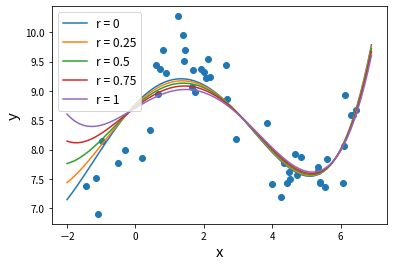

In [21]:
degree = 4
alpha = 0.2
rlist = [0,0.25,0.5,0.75,1]
Xpred = np.arange(-2,7,0.1).reshape(-1,1) # プロット用の行列を生成

poly_features = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_features.fit_transform(X)

plt.figure(facecolor="white")
for r in rlist:
    model = ElasticNet(alpha=alpha,l1_ratio=r) # コレスキーの行列分解テクニック
    model.fit(X_poly,y)
    print("r : ",r)
    print("切片 : ",model.intercept_[0])
    print("傾き : ",model.coef_)
    print("決定係数 : ",model.score(X_poly,y)) # 決定係数を計算する説明変数X,目的変数y
    print("") # 見た目
    Xpred_poly = poly_features.fit_transform(Xpred) # フォーマット変換
    ypred = model.predict(Xpred_poly) # 予測
    plt.plot(Xpred,ypred,label="r = "+str(r))

plt.scatter(df["x"],df["y"])
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend(fontsize=12)
plt.show()